# Concentration to RDF neural network

Short instruction or explanation or description

In [17]:
from conc2RDF import *
import torch

## Loading Data

In [18]:
directory_path = "/largedisk/julius_w/Development/conc2RDF/training_data"
newdir = Directory(directory_path)
newset = DataSetFromList(newdir.get_relevant_files())
train_conc = [10.0, 30.0, 50.0, 70.0, 90.0]
test_conc = [20.0, 40.0, 60.0, 80.0, 100.0]
train_data = newset.get_subset_from_list(newset.get_indices(train_conc))
test_data = newset.get_subset_from_list(newset.get_indices(test_conc))

## Creating the model

In [19]:
model = NeuralNetwork(train_data.get_output_size(), lr=0.0001, num_neuron=50)

## Training the model

In [20]:
model.train_network(train_data, test_data, 1500)

## Analyzing the results

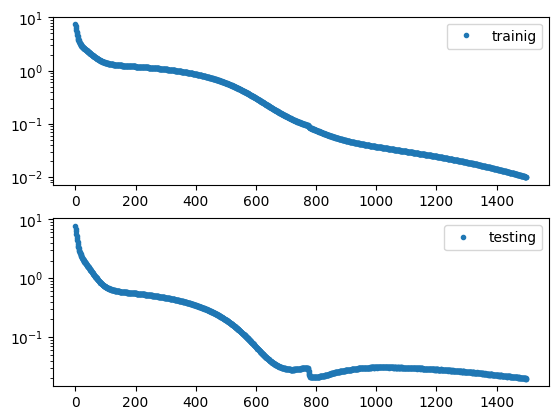

In [21]:
get_dashboard(model)

In [22]:
file = FromXVGFile("/largedisk/julius_w/Development/conc2RDF/training_data/rdf20bu.xvg")
file.get_percentage()
file.read_table()
rvalues = file.rvalues

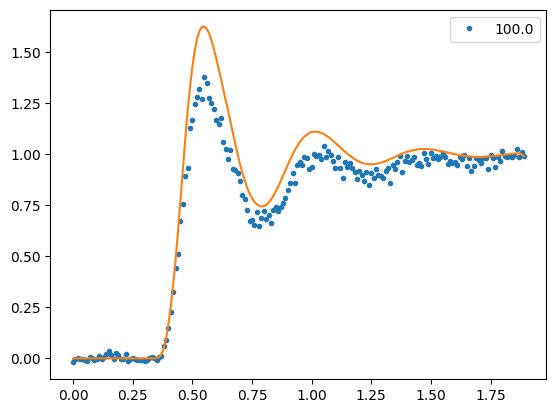

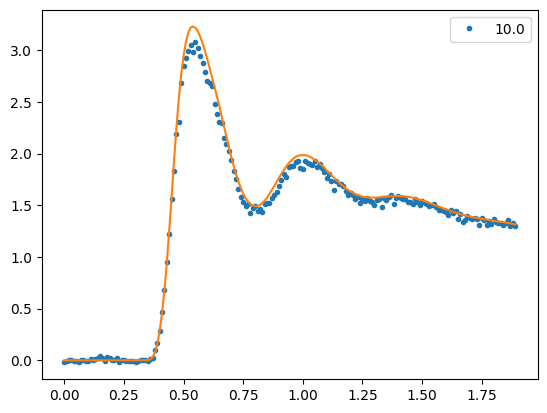

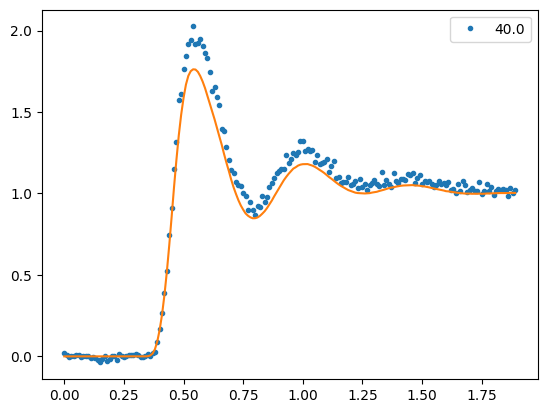

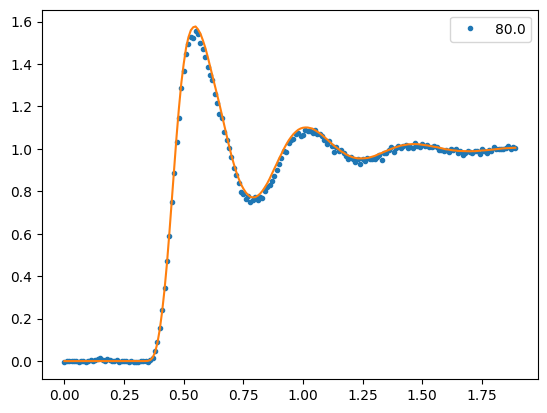

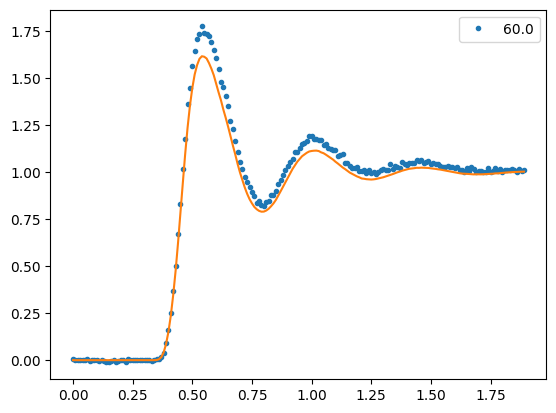

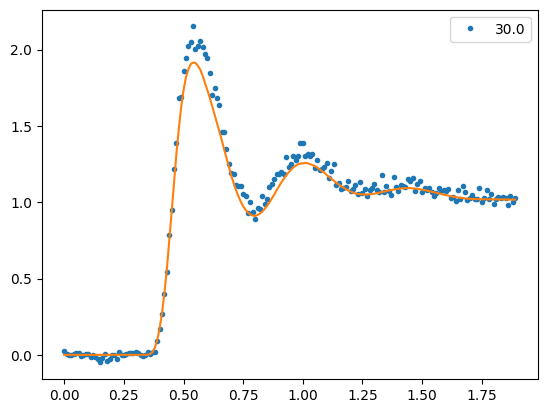

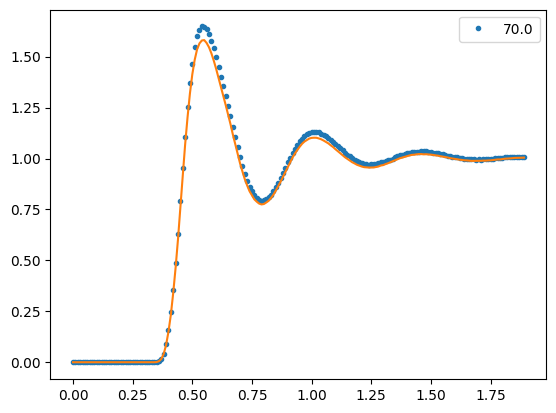

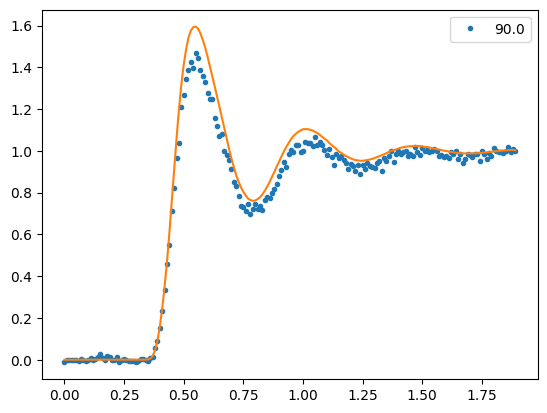

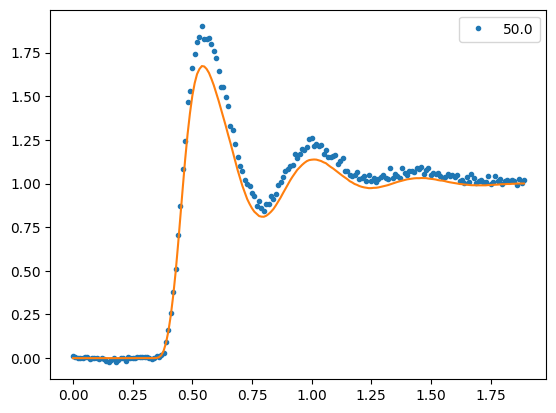

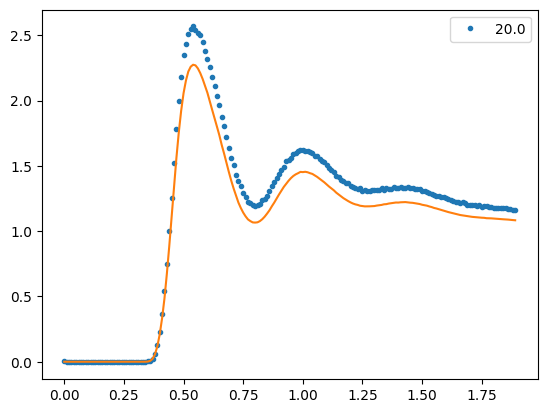

In [23]:
model.eval()
with torch.no_grad():
    for i in range(len(newset.inputs)):
        X = newset.inputs[i]
        pred = model(X)
        plt.plot(rvalues, pred, "o", ms=3, label=f"{X.item()}")
        plt.plot(rvalues, newset.outputs[i])
        plt.legend()
        plt.show()

## Saving Model

In [24]:
model.save_model()